In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-digit-recognizer/train.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27286,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


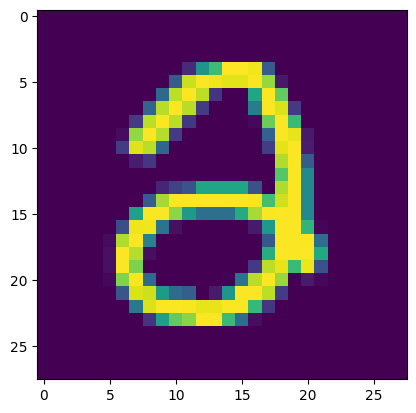

In [7]:
plt.imshow(df.iloc[18777, 1:].values.reshape(28,28))

In [8]:
X= df.iloc[:, 1:]
y= df.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
y_train.shape

(33600,)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [13]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)

X_train_trf= pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [15]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [16]:
import plotly.express as px

y_train_trf= y_train.astype(str)
fig= px.scatter(x= X_train_trf[:,0], 
                y= X_train_trf[:,1],
                color= y_train_trf,
                color_discrete_sequence= px.colors.qualitative.G10
               )

fig.show()

In [17]:
#3D data

pca2= PCA(n_components= 3)

X_train_3d= pca2.fit_transform(X_train)
X_test_3d= pca2.transform(X_test)

In [18]:
y_train_trf= y_train.astype(str)
fig= px.scatter_3d(df, x= X_train_3d[:,0],
                    y= X_train_3d[:, 1],
                    z= X_train_3d[:, 2],
                    color= y_train_trf)
fig.update_layout(
    margin= dict(l= 20, r= 20, t= 20, b= 20)
)

fig.show()

In [19]:
#Eigen Values
pca2.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [20]:
#Eigen Vactor's

pca2.components_.shape

(3, 784)

In [21]:
pca2.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [22]:
pca= PCA(n_components= None)

X_train_trf= pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [23]:
pca.explained_variance_.shape

(784,)

In [24]:
pca.components_.shape

(784, 784)

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

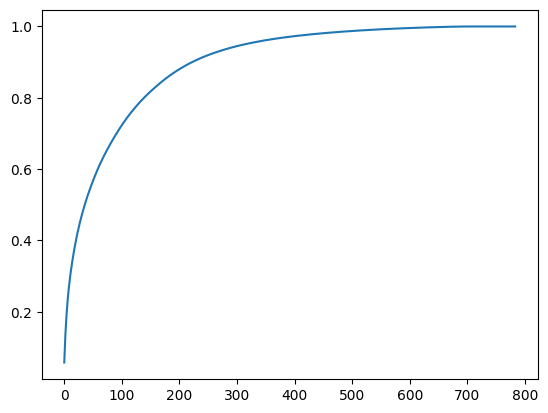

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn= KNeighborsClassifier()

X_train_trf= knn.fit(X_train_trf, y_train)

In [29]:
y_pred= knn.predict(X_test_trf)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9391666666666667